In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
df= pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

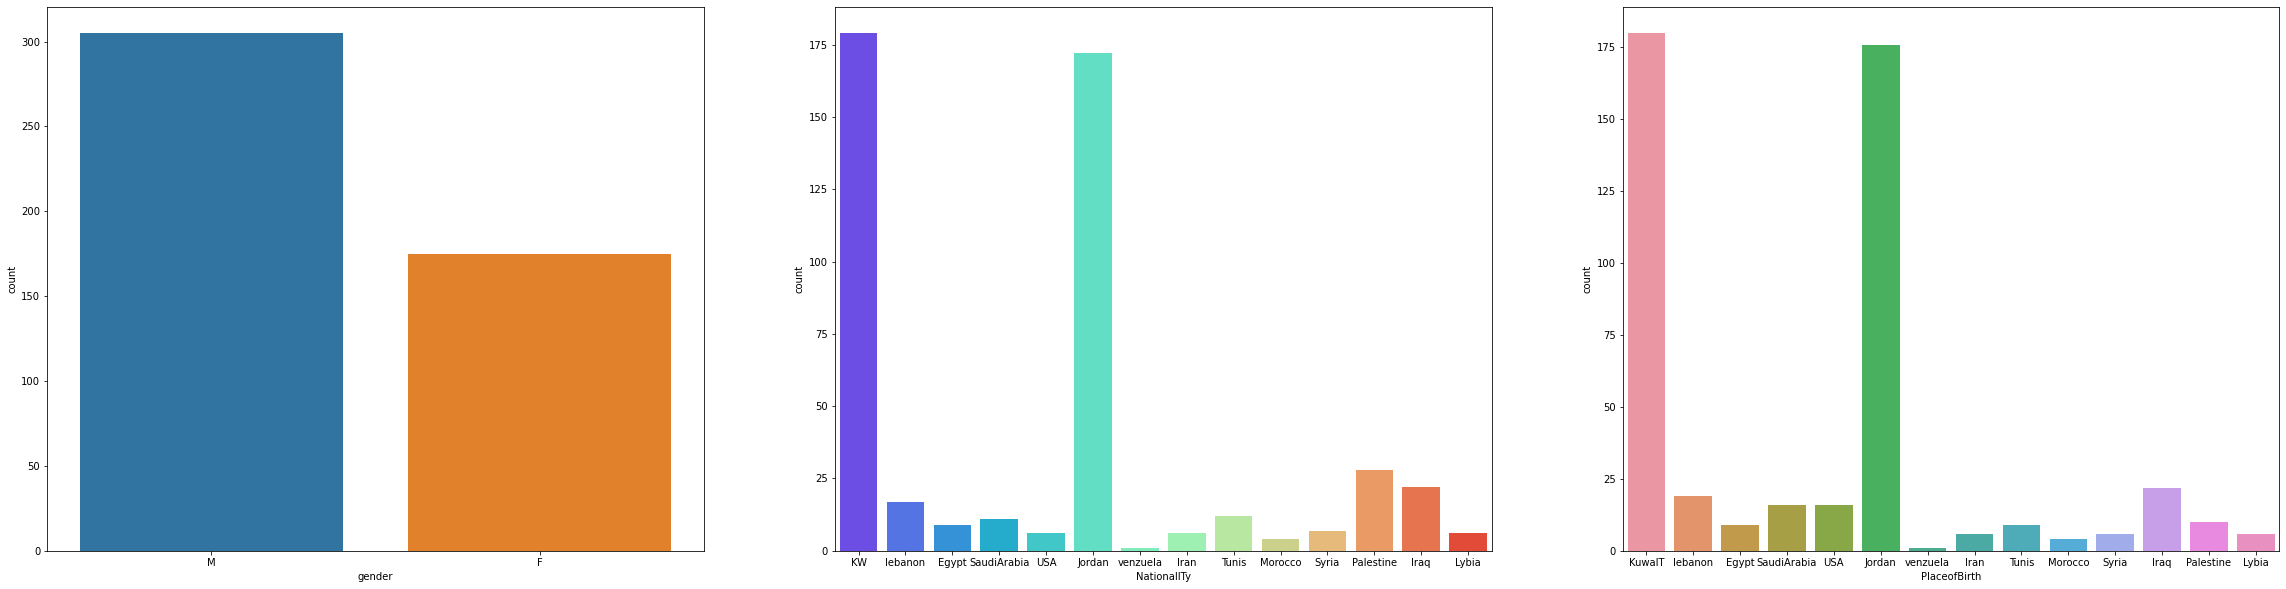

In [13]:
#1

fig, g = plt.subplots(1, 3, figsize=(40,10))
A1 = sns.countplot(data=df , x = 'gender',ax=g[0]);
A2 = sns.countplot(data=df , x = 'NationalITy',palette="rainbow",ax=g[1])
A3 = sns.countplot(data=df , x = 'PlaceofBirth',ax=g[2])
#g2 = sns.countplot(data =data, x= 'NationalITy',palette="rainbow",ax= g[1]);
#g3 = sns.countplot(data =data, x= 'PlaceofBirth',ax= g[2]);

<AxesSubplot:xlabel='StageID', ylabel='count'>

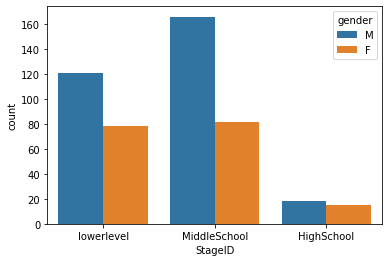

In [17]:
sns.countplot(data=df , x = 'StageID',hue='gender')

<AxesSubplot:xlabel='Topic', ylabel='count'>

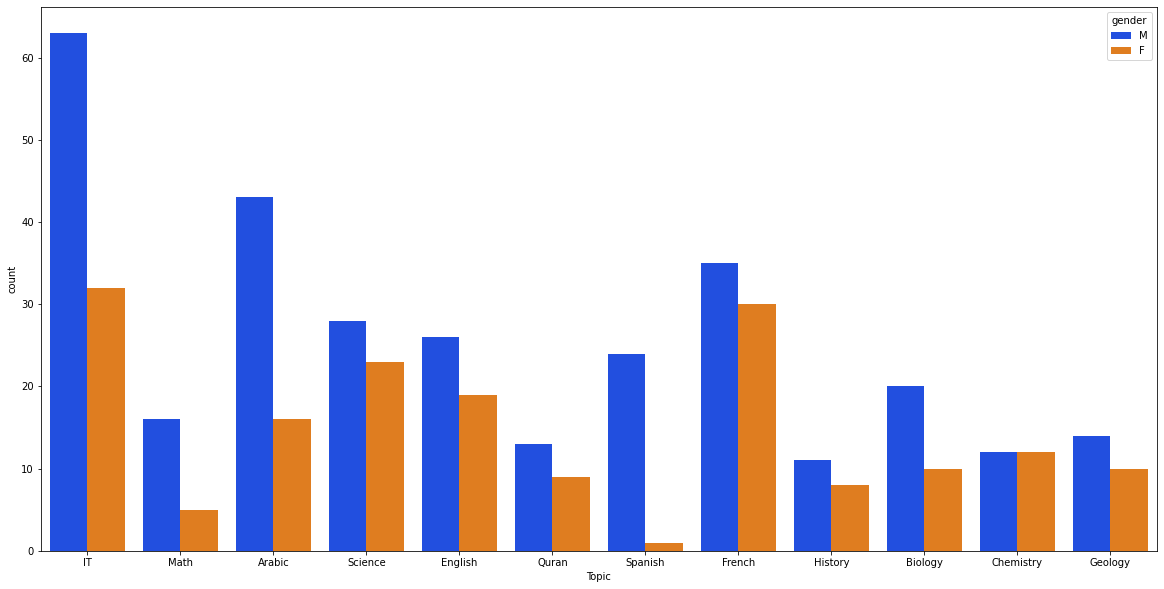

In [19]:
fig= plt.subplots(1, 1, figsize=(20,10))
sns.countplot(data=df, x = 'Topic',hue='gender', palette='bright')

<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

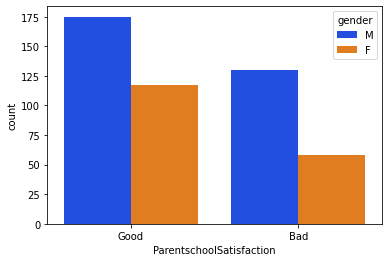

In [20]:
sns.countplot(data=df, x='ParentschoolSatisfaction',palette='bright',hue='gender')

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

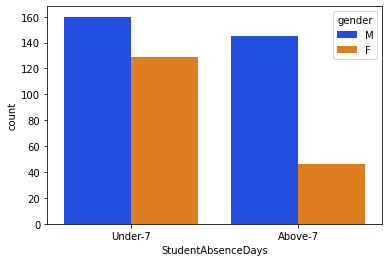

In [21]:
#2
sns.countplot(data=df,x='StudentAbsenceDays',palette='bright', hue='gender')

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

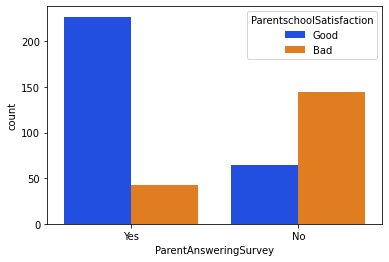

In [23]:
sns.countplot(data=df,x='ParentAnsweringSurvey',palette='bright', hue='ParentschoolSatisfaction')

<AxesSubplot:xlabel='GradeID', ylabel='count'>

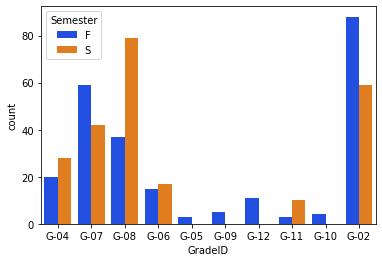

In [24]:
sns.countplot(data=df,x='GradeID',palette='bright', hue='Semester')

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

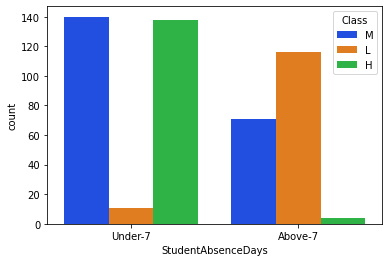

In [25]:
sns.countplot(data=df,x='StudentAbsenceDays',palette='bright', hue='Class')

<AxesSubplot:xlabel='StageID', ylabel='count'>

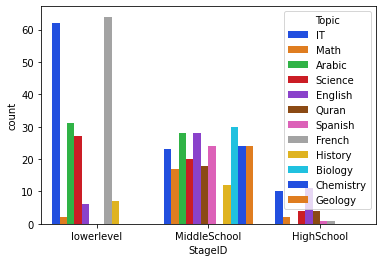

In [26]:
sns.countplot(data=df,x='StageID',palette='bright', hue='Topic')

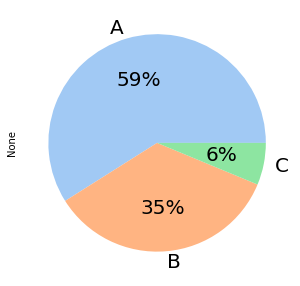

In [28]:
fig = plt.subplots(1,1, figsize=(10, 5))
df.groupby('SectionID').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},colors=sns.color_palette('pastel'));


<AxesSubplot:xlabel='Class', ylabel='Discussion'>

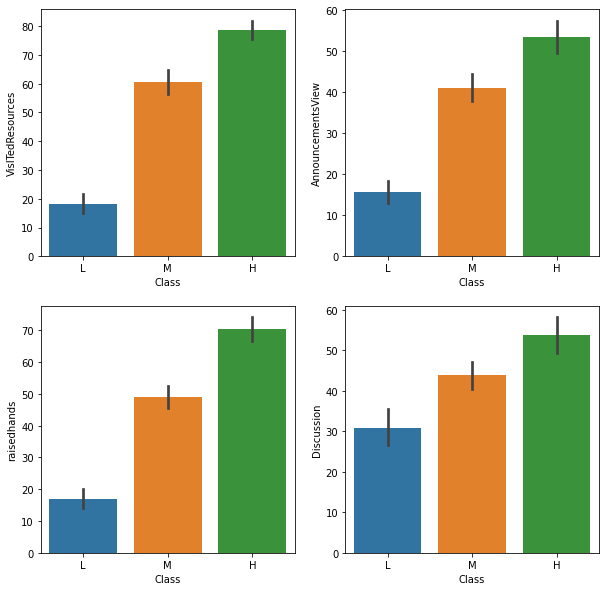

In [29]:
#3

fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot:xlabel='Semester', ylabel='AnnouncementsView'>

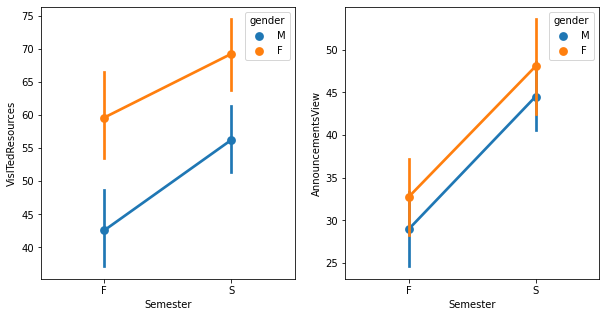

In [35]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

In [69]:
ave_raisedhands = sum(df['raisedhands'])/len(df['raisedhands'])
ave_VisITedResources = sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_AnnouncementsView = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])
unsuccess = df.loc[(df['raisedhands'] >= ave_raisedhands) & (df['VisITedResources']>=ave_VisITedResources) & (df['AnnouncementsView']>=ave_AnnouncementsView)  & (df['Class'] == 'L')]

In [70]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L,1
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L,1


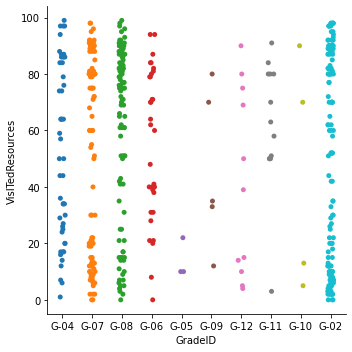

In [40]:
#4
sns.catplot(x="GradeID", y="VisITedResources", data=df)

<AxesSubplot:xlabel='GradeID', ylabel='Discussion'>

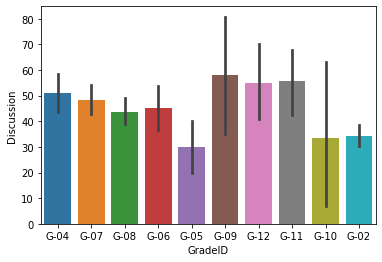

In [41]:
sns.barplot(x='GradeID',y='Discussion',data=df)

<AxesSubplot:xlabel='GradeID', ylabel='count'>

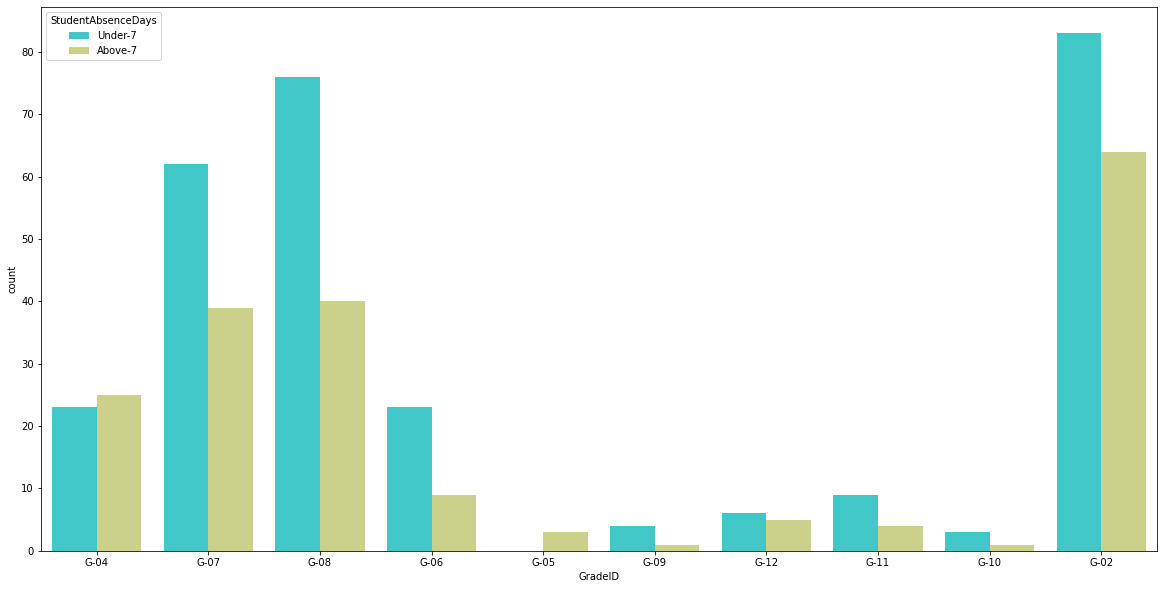

In [42]:
fig= plt.subplots(1, 1, figsize=(20,10))
sns.countplot(x='GradeID',data=df, palette='rainbow',hue='StudentAbsenceDays')

In [ ]:
#each graph shows the change in gradeID according to the specific categorical variable.In my opinion these are the variables that strongly affect the gradeID

In [46]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
num_val=df.iloc[:,9:13]
vif=pd.DataFrame()
vif["Features"]=num_val.columns
vif["VIF"]=[variance_inflation_factor(num_val.values,i) for i in range(len(num_val.columns))]

In [47]:
vif

,Features,VIF
0,raisedhands,7.624493
1,VisITedResources,6.893179
2,AnnouncementsView,6.075343
3,Discussion,3.365527


In [48]:
num_val.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


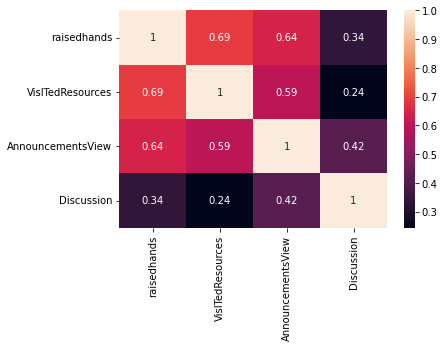

In [49]:
sns.heatmap(num_val.corr(),annot=True);

In [50]:
#5

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [51]:
data = df.drop('Class',axis = 1)
df_with_dummies = pd.get_dummies(data, drop_first=True)

In [53]:
df_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
Features = df_with_dummies.drop(['numeric_class'],axis = 1)
Target = df_with_dummies['numeric_class']

In [60]:
scaler = StandardScaler()
scaler.fit(Features)

StandardScaler()

In [57]:
X = scaler.fit_transform(Features)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144



In [65]:
Prediction

array([2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2], dtype=int64)

In [66]:
Score

0.7361111111111112

In [67]:
print(Report)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

